Generates PyPlot reward plots from stable_baselines TFEvents files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
def reward(filename):
    with open(filename) as f:
        contents = f.readlines()
        
    stringlist = [i for i in contents if not "wall_time" in i]
    stringlist = [i for i in stringlist if not "file_version" in i]
    stringlist = [i for i in stringlist if not "summary" in i]
    stringlist = [i for i in stringlist if not "step" in i]
    stringlist = [i for i in stringlist if not "}\n" in i]
    stringlist = [i for i in stringlist if not "value {\n" in i]
    stringlist_ = stringlist[::2]
    stringlist_value = stringlist[1::2]

    temp = defaultdict(list)
    for c, i in zip(stringlist_, stringlist_value):
        temp[c].append(i)

    lst_ = []
    for v,item in temp.items():
        if v == '    tag: "rollout/ep_rew_mean"\n':
            for val in item:
                lst_.append(val.split()[1])
    lst_f = list(map(float, lst_))
    
    stringlist = [i for i in contents if "step" in i]
    step_list = []
    for int_ in stringlist:
        step_list.append(int_.split()[1])
    step_list_f = list(map(float, step_list))
    steps = list(set(step_list_f))
    
    return steps, lst_f


In [3]:
steps, lst_f = reward("DDPG_128_log.txt")
steps_1, lst_1 = reward("DDPG_126_log.txt")
steps_2, lst_2 = reward("DDPG_124_log.txt")

stepsf, lst_f = zip(*sorted(zip(steps, lst_f)))
steps_1f, lst_1f = zip(*sorted(zip(steps_1, lst_1)))
steps_2f, lst_2f = zip(*sorted(zip(steps_2, lst_2)))

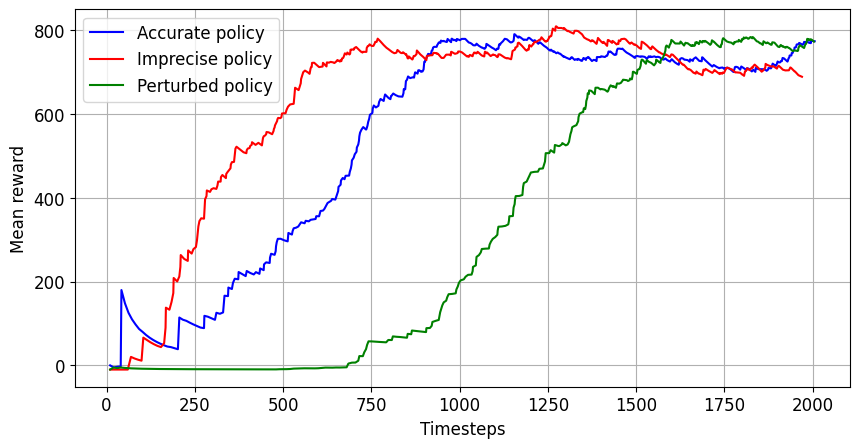

In [5]:
font = {'size'   : 12}

plt.rc('font', **font)

nrows, ncols= 1, 1
ratio, scale = 0.5, 10
dpi= 100
figsize=(ncols*scale, nrows*scale*ratio)
fig, axes= plt.subplots(nrows, ncols, figsize= figsize, dpi= dpi)
axes.grid(True)
axes= np.array(axes).reshape((nrows, ncols))

ax= axes[0, 0]
ax.plot(steps_1f, lst_1f, c= "b", label ="Accurate policy")
ax.plot(stepsf, lst_f, c= "r", label = "Imprecise policy")
ax.plot(steps_2f, lst_2f, c= "g", label = "Perturbed policy")

ax.legend()
ax.set_xlabel("Timesteps")
ax.set_ylabel("Mean reward")
ax.figure.savefig("reward.png")